**Thinkful - 6.1.6 - Challenge - Time Series Analysis**

* Plot the time series, along with any logical or necessary differences to get a stationary dataset
* Generate and interpret a PACF for the time series (and/or its differences)
* Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data
* Finally choose one specification and make the case for that as a logical model for your dataset.

**Heather's Questions**

1. I watched some videos on ritvikmath (Youtube channel), who said that PACF is used to determine the order of the auto-regressive portion of the model, and ACF is used to determine the order of the moving average model. This contradicts what was done in the guided example, where they used PACF on both the S&P data and the differenced S&P data, but ACF was never used.
2. Should the ARIMA models be run on the given data, or differenced data? I tried five models of the same order on both, below.
3. If you run an ARIMA model on differenced data, how do you get back to the original data?
4. What does integrating an ARIMA model actually do?
5. Need assistance troubleshooting why my models aren't fitting the data better.

In [134]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline

In [135]:
df = pd.read_csv('Data/unemployment rate.csv')

# Remove NA's
df.dropna(inplace=True)
df.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


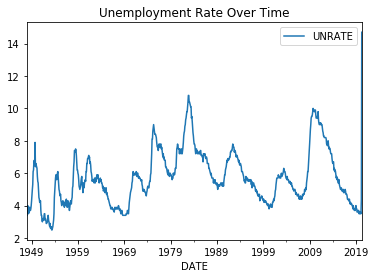

In [136]:
df.index = pd.to_datetime(df.DATE)
df.plot()
plt.title('Unemployment Rate Over Time')
plt.show()

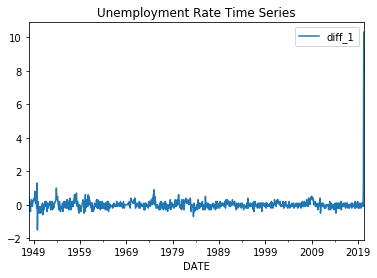

In [137]:
df['diff_1'] = df['UNRATE'] - df['UNRATE'].shift()
unrate = df['UNRATE']
diff_1 = df['diff_1']
df.plot(y='diff_1')
plt.title('Unemployment Rate Time Series')
plt.show()

In [138]:
df.head()

,DATE,UNRATE,diff_1
DATE,,,
1948-01-01,1948-01-01,3.4,NaN
1948-02-01,1948-02-01,3.8,0.4
1948-03-01,1948-03-01,4.0,0.2
1948-04-01,1948-04-01,3.9,-0.1
1948-05-01,1948-05-01,3.5,-0.4


**PACF on INITIAL and DIFFERENCED time series**

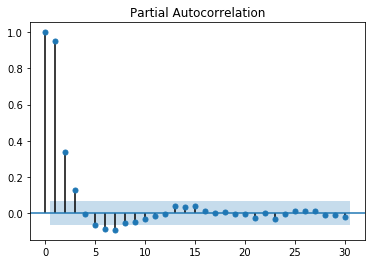

In [139]:
pacf_plot1 = plot_pacf(df['UNRATE'])

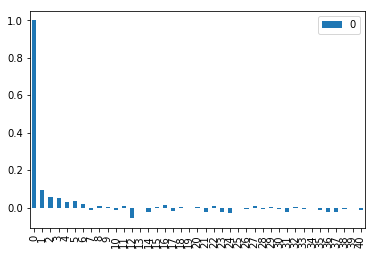

In [140]:
pacf_plot2 = pd.DataFrame(pacf(df.diff_1[1:]))
pacf_plot2.plot(kind='bar')

**ACF on INITIAL and DIFFERENCED time series**

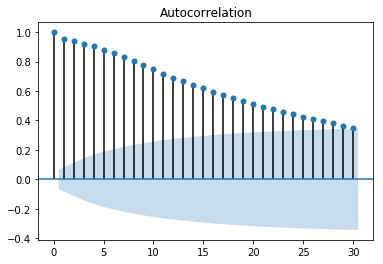

In [141]:
acf_plot1 = plot_acf(df['UNRATE'])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


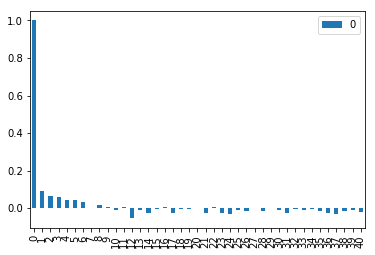

In [142]:
acf_plot2 = pd.DataFrame(acf(df.diff_1[1:]))
acf_plot2.plot(kind='bar')

**ARIMA Models**

In [143]:
train_end = datetime(1970,1,1)
test_end = datetime(2020,3,25)

train_data = unrate[:train_end]
test_data = unrate[train_end + timedelta(days=1):test_end]

In [144]:
model_111 = ARIMA(train_data, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  264
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -17.658
Method:                       css-mle   S.D. of innovations              0.259
Date:                Thu, 28 May 2020   AIC                             43.317
Time:                        20:04:35   BIC                             57.620
Sample:                    02-01-1948   HQIC                            49.064
                         - 01-01-1970                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0041      0.028      0.147      0.883      -0.051       0.059
ar.L1.D.UNRATE     0.8197      0.067     12.298      0.000       0.689       0.950
ma.L1.D.UNRATE    -0.6793      0.077

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [145]:
model_001 = ARIMA(train_data, order=(0,0,1))
model_001_fit = model_001.fit()
print(model_001_fit.summary())
print('Residuals Description')
print(model_001_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                 UNRATE   No. Observations:                  265
Model:                     ARMA(0, 1)   Log Likelihood                -279.957
Method:                       css-mle   S.D. of innovations              0.694
Date:                Thu, 28 May 2020   AIC                            565.913
Time:                        20:04:35   BIC                            576.653
Sample:                    01-01-1948   HQIC                           570.228
                         - 01-01-1970                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.6614      0.080     58.185      0.000       4.504       4.818
ma.L1.UNRATE     0.8826      0.024     36.969      0.000       0.836       0.929
                                    Roots   

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [146]:
model_616 = ARIMA(train_data, order=(6,1,6))
model_616_fit = model_616.fit()
print(model_616_fit.summary())
print('Residuals Description')
print(model_616_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  264
Model:                 ARIMA(6, 1, 6)   Log Likelihood                   6.699
Method:                       css-mle   S.D. of innovations              0.231
Date:                Thu, 28 May 2020   AIC                             14.602
Time:                        20:04:42   BIC                             64.665
Sample:                    02-01-1948   HQIC                            34.719
                         - 01-01-1970                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0051      0.025      0.206      0.837      -0.043       0.054
ar.L1.D.UNRATE     1.1470      0.060     19.154      0.000       1.030       1.264
ar.L2.D.UNRATE    -0.4322      0.083

In [147]:
model_010 = ARIMA(train_data, order=(0,1,0))
model_010_fit = model_010.fit()
print(model_010_fit.summary())
print('Residuals Description')
print(model_010_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  264
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -25.345
Method:                           css   S.D. of innovations              0.266
Date:                Thu, 28 May 2020   AIC                             54.689
Time:                        20:04:43   BIC                             61.841
Sample:                    02-01-1948   HQIC                            57.563
                         - 01-01-1970                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.016      0.116      0.908      -0.030       0.034
Residuals Description
count    2.640000e+02
mean     2.009712e-09
std      2.668579e-01
min     -1.501894e+00
25%     -1.018939e-01

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [148]:
model_212 = ARIMA(train_data, order=(2,1,2))
model_212_fit = model_212.fit()
print(model_212_fit.summary())
print('Residuals Description')
print(model_212_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.UNRATE   No. Observations:                  264
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  -1.992
Method:                       css-mle   S.D. of innovations              0.242
Date:                Thu, 28 May 2020   AIC                             15.984
Time:                        20:04:43   BIC                             37.439
Sample:                    02-01-1948   HQIC                            24.605
                         - 01-01-1970                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0035      0.023      0.149      0.882      -0.042       0.049
ar.L1.D.UNRATE     1.6657      0.038     43.673      0.000       1.591       1.740
ar.L2.D.UNRATE    -0.8342      0.039

**Comparing Model AIC**

In [151]:
models = ['ARIMA(1,1,1)',
          'ARIMA(0,0,1)',
          'ARIMA(6,1,6)',
          'ARIMA(0,1,0)',
          'ARIMA(2,1,2)',]
AIC_comparison = pd.DataFrame(models,index=models)
AIC_comparison['AIC'] = [43.317,
                         565.913,
                         14.602,
                         54.689,
                         15.984]
AIC_comparison.columns = ['Model','AIC']
AIC_comparison['Loss'] = np.exp((14.602-AIC_comparison['AIC'])/2)
AIC_comparison

,Model,AIC,Loss
"ARIMA(1,1,1)","ARIMA(1,1,1)",43.317,5.815901e-07
"ARIMA(0,0,1)","ARIMA(0,0,1)",565.913,1.924587e-120
"ARIMA(6,1,6)","ARIMA(6,1,6)",14.602,1.000000e+00
"ARIMA(0,1,0)","ARIMA(0,1,0)",54.689,1.973416e-09
"ARIMA(2,1,2)","ARIMA(2,1,2)",15.984,5.010747e-01


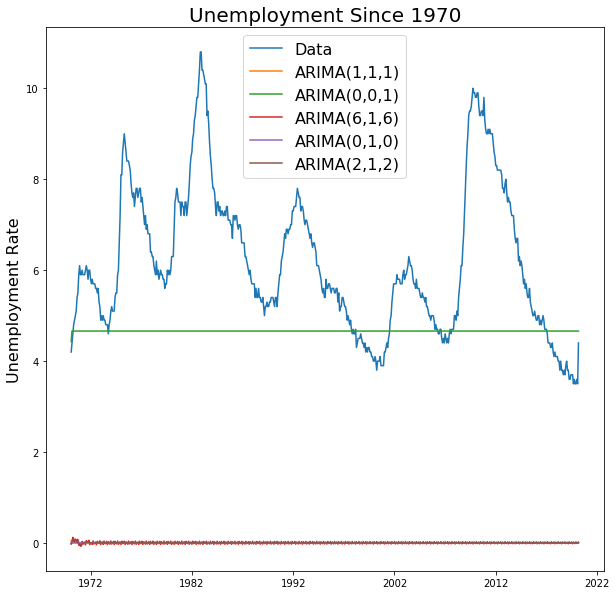

In [150]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

pred111 = model_111_fit.predict(start=pred_start_date, end=pred_end_date)
pred001 = model_001_fit.predict(start=pred_start_date, end=pred_end_date)
pred616 = model_616_fit.predict(start=pred_start_date, end=pred_end_date)
pred010 = model_010_fit.predict(start=pred_start_date, end=pred_end_date)
pred212 = model_212_fit.predict(start=pred_start_date, end=pred_end_date)


plt.figure(figsize=(10,10))

plt.plot(test_data)
plt.plot(pred111)
plt.plot(pred001)
plt.plot(pred616)
plt.plot(pred010)
plt.plot(pred212)

plt.legend(('Data', 'ARIMA(1,1,1)','ARIMA(0,0,1)',
            'ARIMA(6,1,6)','ARIMA(0,1,0)','ARIMA(2,1,2)'),
           fontsize=16)

plt.title('Unemployment Since 1970', fontsize=20)
plt.ylabel('Unemployment Rate', fontsize=16)

**ARIMA Models Using First Difference**

In [124]:
#train_end = datetime(1970,1,1)
test_end = datetime(2020,4,1)

train_start = datetime(1948,1,1)
train_data_diff = diff_1[train_start+ timedelta(days=1):train_end]
test_data_diff = diff_1[train_end + timedelta(days=1):test_end]

In [116]:
# Remove NA's
df.dropna(inplace=True)
df.head()

,DATE,UNRATE,diff_1
DATE,,,
1948-02-01,1948-02-01,3.8,0.4
1948-03-01,1948-03-01,4.0,0.2
1948-04-01,1948-04-01,3.9,-0.1
1948-05-01,1948-05-01,3.5,-0.4
1948-06-01,1948-06-01,3.6,0.1


In [118]:
model_111_diff = ARIMA(train_data_diff, order=(1,1,1))
model_111_diff_fit = model_111_diff.fit()
print(model_111_diff_fit.summary())
print('Residuals Description')
print(model_111_diff_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -20.964
Method:                       css-mle   S.D. of innovations              0.262
Date:                Thu, 28 May 2020   AIC                             49.928
Time:                        19:35:01   BIC                             64.217
Sample:                    03-01-1948   HQIC                            55.670
                         - 01-01-1970                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0001      0.005     -0.024      0.981      -0.009       0.009
ar.L1.D.diff_1    -0.3015      0.079     -3.817      0.000      -0.456      -0.147
ma.L1.D.diff_1    -0.6312      0.069

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [132]:
model_001_diff = ARIMA(train_data_diff, order=(0,0,1))
model_001_diff_fit = model_001_diff.fit()
print(model_001_diff_fit.summary())
print('Residuals Description')
print(model_001_diff_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                 diff_1   No. Observations:                  264
Model:                     ARMA(0, 1)   Log Likelihood                 -25.077
Method:                       css-mle   S.D. of innovations              0.266
Date:                Thu, 28 May 2020   AIC                             56.153
Time:                        19:47:03   BIC                             66.881
Sample:                    02-01-1948   HQIC                            60.464
                         - 01-01-1970                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0020      0.017      0.118      0.906      -0.031       0.035
ma.L1.diff_1     0.0363      0.050      0.730      0.465      -0.061       0.134
                                    Roots   

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [121]:
model_616_diff = ARIMA(train_data_diff, order=(6,0,6))
model_616_diff_fit = model_616_diff.fit()
print(model_616_diff_fit.summary())
print('Residuals Description')
print(model_616_diff_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                              ARMA Model Results                              
Dep. Variable:                 diff_1   No. Observations:                  264
Model:                     ARMA(6, 6)   Log Likelihood                   6.699
Method:                       css-mle   S.D. of innovations              0.231
Date:                Thu, 28 May 2020   AIC                             14.602
Time:                        19:36:37   BIC                             64.665
Sample:                    02-01-1948   HQIC                            34.719
                         - 01-01-1970                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0051      0.025      0.206      0.837      -0.043       0.054
ar.L1.diff_1     1.1470      0.060     19.154      0.000       1.030       1.264
ar.L2.diff_1    -0.4322      0.083     -5.21

In [122]:
model_010_diff = ARIMA(train_data_diff, order=(0,1,0))
model_010_diff_fit = model_010_diff.fit()
print(model_010_diff_fit.summary())
print('Residuals Description')
print(model_010_diff_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  263
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -108.121
Method:                           css   S.D. of innovations              0.365
Date:                Thu, 28 May 2020   AIC                            220.242
Time:                        19:37:48   BIC                            227.386
Sample:                    03-01-1948   HQIC                           223.113
                         - 01-01-1970                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.223e-14      0.023  -1.43e-12      1.000      -0.044       0.044
Residuals Description
count    2.630000e+02
mean     3.223868e-14
std      3.657054e-01
min     -2.800000e+00
25%     -2.000000e-01

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [123]:
model_212_diff = ARIMA(train_data_diff, order=(2,1,2))
model_212_diff_fit = model_212_diff.fit()
print(model_212_diff_fit.summary())
print('Residuals Description')
print(model_212_diff_fit.resid.describe())

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmo

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  263
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -12.175
Method:                       css-mle   S.D. of innovations              0.251
Date:                Thu, 28 May 2020   AIC                             36.350
Time:                        19:38:30   BIC                             57.783
Sample:                    03-01-1948   HQIC                            44.963
                         - 01-01-1970                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0002      0.000     -0.453      0.650      -0.001       0.001
ar.L1.D.diff_1     0.4431      0.120      3.692      0.000       0.208       0.678
ar.L2.D.diff_1     0.2815      0.064

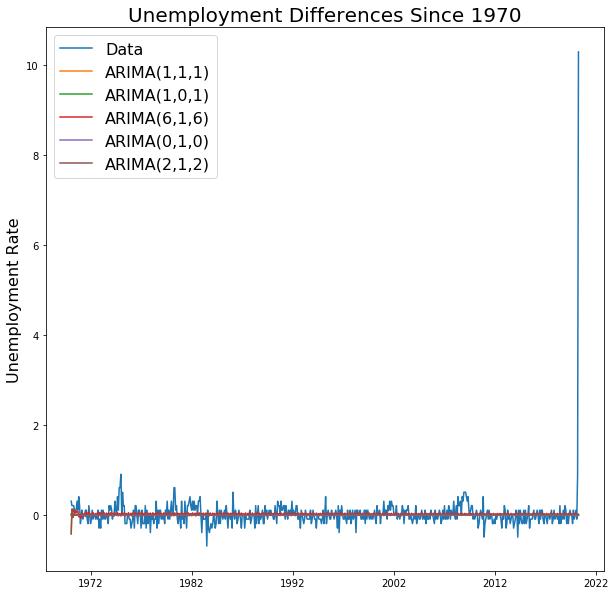

In [133]:
#get prediction start and end dates
pred_start_date_diff = test_data_diff.index[0]
pred_end_date_diff = test_data_diff.index[-1]

pred111_diff = model_111_diff_fit.predict(start=pred_start_date_diff, end=pred_end_date_diff)
pred001_diff = model_001_diff_fit.predict(start=pred_start_date_diff, end=pred_end_date_diff)
pred616_diff = model_616_diff_fit.predict(start=pred_start_date_diff, end=pred_end_date_diff)
pred010_diff = model_010_diff_fit.predict(start=pred_start_date_diff, end=pred_end_date_diff)
pred212_diff = model_212_diff_fit.predict(start=pred_start_date_diff, end=pred_end_date_diff)


plt.figure(figsize=(10,10))

plt.plot(test_data_diff)
plt.plot(pred111_diff)
plt.plot(pred001_diff)
plt.plot(pred616_diff)
plt.plot(pred010_diff)
plt.plot(pred212_diff)

plt.legend(('Data', 'ARIMA(1,1,1)','ARIMA(1,0,1)',
            'ARIMA(6,1,6)','ARIMA(0,1,0)','ARIMA(2,1,2)'),
           fontsize=16)

plt.title('Unemployment Differences Since 1970', fontsize=20)
plt.ylabel('Unemployment Rate', fontsize=16)